# Linear Regression

In [31]:
import numpy as np

class LinearRegression:

    def __init__(self, learning_rate=0.001, max_iterations=10000, min_delta_iterations=0.0001):
        """
        Simple Linear Regression model.

        Parameters
        ----------
        learning_rate : float, optional
            The learning rate (between 0.0 and 1.0).
        max_iterations : int, optional
            The number of maximum training iterations.
        min_delta_iterations : float, optional
            The minimal change between delta iterations (between 0.0 and 1.0).
            
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.min_delta_iterations = min_delta_iterations
        self.coefficient = 0
        self.intercept = 0
        self.mean_squared_error = None
        self.reason = None

    def fit(self, X, Y):
        
        """
        Fit the model to the training data.

        Parameters
        ----------
        X : array-like, shape (n_samples)
            The training data.
        Y : array-like, shape (n_samples,)
            The target values.
        """
        self.fit_gradient_descent(X, Y)

    def fit_gradient_descent(self, X, Y):
        
        
        """"
        Fit the model using Gradient Descent.

        Parameters
        ----------
        X : array-like, shape (n_samples)
            The training data.
        Y : array-like, shape (n_samples,)
            The target values.
        """
        Y_mean = np.mean(Y)
        sum_squared_total = np.sum((Y - Y_mean) ** 2)
        n = float(len(X))

        for i in range(self.max_iterations + 1):
            Y_pred = self.coefficient * X + self.intercept
            dif = Y - Y_pred
            gradient_coefficient = (-2 / n) * np.sum(X * dif)
            gradient_intercept = (-2 / n) * np.sum(dif)
            
            old_error = np.sum(((X * self.coefficient + self.intercept) - Y) ** 2)
            
            self.coefficient -= self.learning_rate * gradient_coefficient
            self.intercept -= self.learning_rate * gradient_intercept
            
            new_error = np.sum(((X * self.coefficient + self.intercept) - Y) ** 2)
            self.mean_squared_error = new_error / n
            
            delta_iterations = ((new_error - old_error) / old_error)
            
            if abs(delta_iterations) < self.min_delta_iterations:
                self.reason = (f'Stopped with a delta_iterations of {round(delta_iterations, 5)} ')
                break
            elif i == self.max_iterations:
                self.reason = (f'Stopped with the max_iterations of {self.max_iterations}')

    def R2(self, Y):
        """
        Returns R squared.

        Parameters
        ----------
        Y : array-like, shape (n_samples,)
            The target values.
        """
        sum_squared_total = np.sum((Y - np.mean(Y)) ** 2)
        r_squared = 1 - (self.mean_squared_error / sum_squared_total)
        print(f'{round((r_squared) * 100, 2)}% of the DataSet variability is explained by the constructed model')

    def predict(self, X):
        """
        Make predictions for input matrix X.

        Parameters
        ----------
        X : array-like, shape (n_samples)
            The input data.

        Returns
        -------
        None
        """
        if not self.coefficient or not self.intercept:
            print("The model has not been trained yet!")
            return

        predictions = X * self.coefficient + self.intercept
        rounded_predictions = np.round(predictions, 2)  # Arredondar cada valor para 2 casas decimais
          
        return predictions
        
             
    def predict_input(self):
        """
        Predict the output of a given X provided by a prompt(input) of X.

        The input only accepts numbers, but there is a possibility to exit the loop with a word in the list:
        ['quit', 'sair', 'leave', 'exit', 'parar', 'stop','ok', ' ']

        Returns
        -------
        None
        """
        
        
        while True:
            user_input = input('What is the value of X? ')
            
            if user_input.lower() in ['quit', 'sair', 'leave', 'exit', 'parar', 'stop', 'ok','']:
                break
            else:
                try:
                    user_input = float(user_input)
                    prediction = self.coefficient * user_input + self.intercept
                    
                    if prediction is not None:
                        print(f'For an X of {user_input}, the expected output is {round(prediction, 2)}')
                        break
                except ValueError:
                    print('A number must be selected, or exit the function, please try again!')
                    

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
Data = pd.read_csv('C:/Users/skorg/Downloads/Salary_Data.csv')
print(Data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [34]:
Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


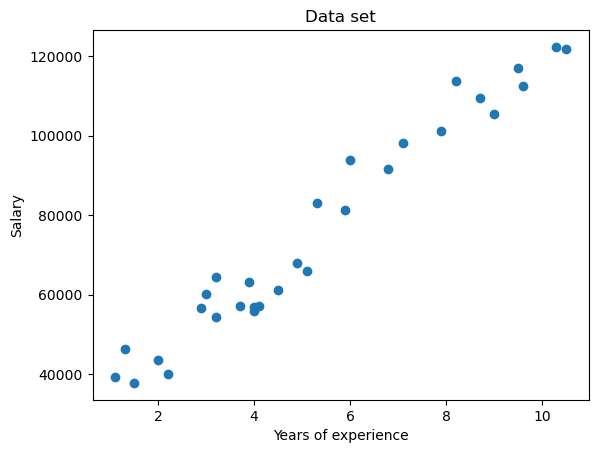

In [35]:
#plot of dataset
plt.scatter(Data.iloc[:,0:1].values,Data.iloc[:,1].values)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Data set')
plt.show()

In [36]:
#training and testing size
train_size=int(0.8*Data.shape[0])
test_size=int(0.2*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 24
Testing set size : 6


In [37]:
Data=Data.sample(frac=1)
X=Data.iloc[:,0:1].values
Y=Data.iloc[:,1].values

In [38]:
X_train=X[0:train_size,:]
Y_train=Y[0:train_size]

In [44]:
print(X_train.shape)
print(Y_train.shape)

(24, 1)
(24,)


In [39]:
X_test=X[train_size:,:]
Y_test=y[train_size:]

In [45]:
print(X_test.shape)
print(Y_test.shape)

(6, 1)
(6,)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = LinearRegression(learning_rate=0.001, max_iterations=10000, min_delta_iterations=0.0001)
model.fit(X_train.flatten(), Y_train.flatten())
model_predictions = model.predict(X_test.flatten())
model_mse = mean_squared_error(Y_test.flatten(), model_predictions)

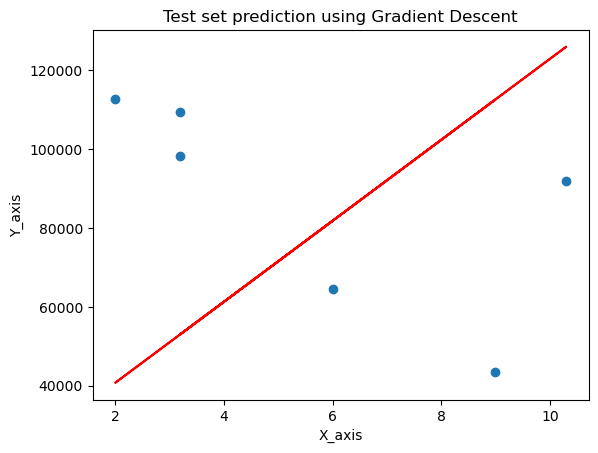

In [53]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,model_predictions,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.title('Test set prediction using Gradient Descent')
plt.show()